In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from scipy import stats

np.random.seed(42)

import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

path = "./data/stability_data"
output_path = os.path.join(path, "stability_with_unirep_fusion.hdf")

ids = pd.read_hdf(output_path, key="ids")
reps = pd.read_hdf(output_path, key="reps")

print("X: {}".format(reps.shape))
print("Y: {}".format(ids["stability"].shape))

# LassoLars usage: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html#sklearn.linear_model.LassoLars

X: (3580, 5700)
Y: (3580,)
3043 points in test set
Training 10-fold cross validated LassoLars with UniRep Fusion representations as input...


LassoLarsCV(copy_X=True, cv=3, eps=2.220446049250313e-16, fit_intercept=True,
      max_iter=500, max_n_alphas=1000, n_jobs=1, normalize=True,
      positive=False, precompute='auto', verbose=False)

In [12]:
from data_utils import aa_seq_to_int

seq_ints = []

for seq in ids["sequence"]:
    seq_int = aa_seq_to_int(seq)
    seq_ints += [seq_int]
    
X_train, X_test, y_train, y_test = train_test_split(seq_ints, ids["stability"], test_size=0.15)

cv = 3
reg_sequences = linear_model.LassoLarsCV(cv=cv)
print("Training...")
reg_sequences.fit(X_train, y_train)

score_train = reg_sequences.score(X_train, y_train)
score_test = reg_sequences.score(X_test, y_test)
print("Train score: {}".format(score_train))
print("Test score: {}".format(score_test))

Training...
Train score: 0.5382570219393885
Test score: 0.46810670228674983


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reps, ids["stability"], test_size=0.15)
print("{} points in test set".format(X_train.shape[0]))

cv = 3
reg_uni = linear_model.LassoLarsCV(cv=cv)
print("Training {}-fold cross validated LassoLars with UniRep Fusion representations as input...".format())
reg_uni.fit(X_train, y_train)

In [4]:
score_train = reg_uni.score(X_train, y_train)
score_test = reg_uni.score(X_test, y_test)
print("Train score: {}".format(score_train))
print("Test score: {}".format(score_test))

# Get Spearman's p correlation on test set predictions
test_predictions = reg_uni.predict(X_test)
spearman_test = stats.spearmanr(test_predictions, y_test)
print("Spearman's p on test set: {}".format(spearman_test))

# Plot the predictions vs. measured values
import plotly.plotly as py
import plotly
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='xanderdunn', api_key='GtTpDQavToMaADqeMMu4')

trace = go.Scatter(
    x = test_predictions,
    y = y_test,
    mode = 'markers'
)

py.iplot([trace], filename="Peptide Stability Prediction vs. Measured Stability")

Train score: 0.8200515095336283
Test score: 0.7875233713715409
Spearman's p on test set: SpearmanrResult(correlation=0.886059987469155, pvalue=9.15952668170599e-181)


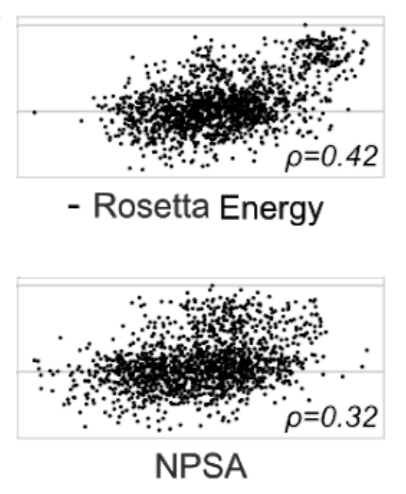